In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2019-09-09 02:49:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 2607:f8b0:4004:811::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.03s   

2019-09-09 02:49:01 (2.13 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [5]:
data = open('/tmp/irish-lyrics-eof.txt').read()
corpus = data.lower().split('\n')

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [9]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[: i+1]
        input_sequences.append(n_gram_sequence)

In [12]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding='pre'))

In [18]:
# Create predictors and label
xs, labels = input_sequences[:, :-1], input_sequences[:,-1]
ys = ku.to_categorical(labels, num_classes=total_words)

In [19]:
print(tokenizer.word_index['come'])
print(tokenizer.word_index['all'])
print(tokenizer.word_index['ye'])
print(tokenizer.word_index['maidens'])
print(tokenizer.word_index['young'])
print(tokenizer.word_index['fair'])

51
12
96
1217
48
69


In [24]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics = ['accuracy'])
history = model.fit(xs, ys, epochs = 100, verbose = 1)

Train on 12038 samples
Epoch 1/100
12038/12038 [==============================] - 13s 1ms/sample - loss: 6.6818 - accuracy: 0.0741
Epoch 2/100
12038/12038 [==============================] - 10s 820us/sample - loss: 5.7801 - accuracy: 0.1127
Epoch 3/100
12038/12038 [==============================] - 10s 829us/sample - loss: 4.8755 - accuracy: 0.1596
Epoch 4/100
12038/12038 [==============================] - 10s 833us/sample - loss: 3.9602 - accuracy: 0.2314
Epoch 5/100
12038/12038 [==============================] - 10s 820us/sample - loss: 3.1013 - accuracy: 0.3423
Epoch 6/100
12038/12038 [==============================] - 10s 822us/sample - loss: 2.4045 - accuracy: 0.4545
Epoch 7/100
12038/12038 [==============================] - 10s 822us/sample - loss: 1.9096 - accuracy: 0.5540
Epoch 8/100
12038/12038 [==============================] - 10s 831us/sample - loss: 1.5281 - accuracy: 0.6352
Epoch 9/100
12038/12038 [==============================] - 10s 827us/sample - loss: 1.3038 - accura

12038/12038 [==============================] - 10s 823us/sample - loss: 0.8722 - accuracy: 0.7674
Epoch 75/100
12038/12038 [==============================] - 10s 825us/sample - loss: 0.8729 - accuracy: 0.7679
Epoch 76/100
12038/12038 [==============================] - 10s 820us/sample - loss: 0.8495 - accuracy: 0.7732
Epoch 77/100
12038/12038 [==============================] - 10s 837us/sample - loss: 0.8431 - accuracy: 0.7725
Epoch 78/100
12038/12038 [==============================] - 10s 834us/sample - loss: 0.8401 - accuracy: 0.7763
Epoch 79/100
12038/12038 [==============================] - 10s 825us/sample - loss: 0.8296 - accuracy: 0.7750
Epoch 80/100
12038/12038 [==============================] - 10s 820us/sample - loss: 0.8418 - accuracy: 0.7765
Epoch 81/100
12038/12038 [==============================] - 10s 830us/sample - loss: 0.8062 - accuracy: 0.7856
Epoch 82/100
12038/12038 [==============================] - 10s 828us/sample - loss: 0.7960 - accuracy: 0.7883
Epoch 83/100
1

In [25]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.show()

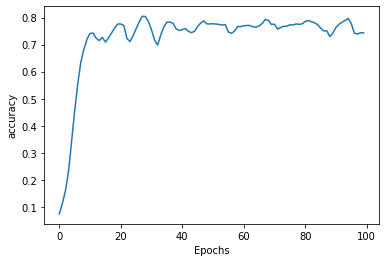

In [26]:
plot_graphs(history, 'accuracy');

In [27]:
seed_text = 'A poor emigrants daughter'
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word=''
    
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += ' ' + output_word
print(seed_text)

A poor emigrants daughter too frightened to boil temper i was losing must fair maiden it love i love my love i love best love love prove still day by law gone again on its clothes under ten grand did poured love rings them love you shoving i wish i relations shaken i could theres magic in joy i love i love i love i love i love i love neer love thee pistols road you love mary i love has my love and gone i love i love i love i love i love i love best love song from rising again return
